## Regression from scratch

Importing and showing dataset

In [246]:
import pandas as pd
import numpy as np

In [247]:
data = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [248]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Verifying the number of null values

In [249]:
data.isnull().count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

The next 2 lines where useful to have a preview of the variables.

In [250]:
import matplotlib.pyplot as plt

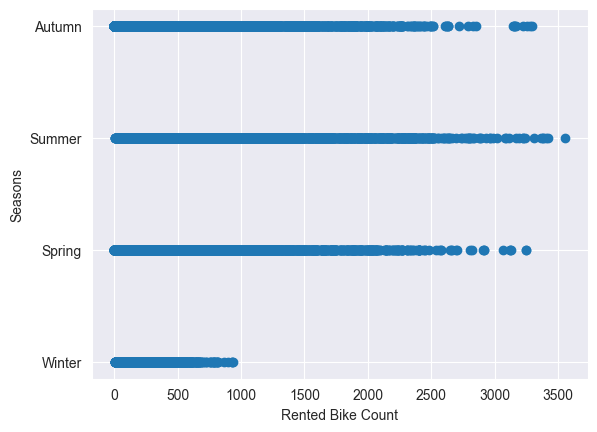

In [251]:
plt.scatter(data['Rented Bike Count'], data['Seasons'])
plt.ylabel('Seasons')
plt.xlabel('Rented Bike Count')
plt.show()

Defining Y - Rented Bike Count

In [252]:
Y = data['Rented Bike Count'].to_numpy()
Y = Y.reshape((Y.shape[0], 1))
Y_backup = Y
Y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])

In [253]:
Y.shape

(8760, 1)

Defining X

In [254]:
seasons = pd.Categorical(data['Seasons'])
seasons = seasons.rename_categories([1,2,3,4])
holidays = pd.Categorical(data['Holiday'])
holidays = holidays.rename_categories([0,1])

In [255]:
data['Seasons'] = seasons
data['Holiday'] = holidays

In [256]:
X = data.drop(columns=['Date', 'Rented Bike Count','Functioning Day']).to_numpy()
X_backup = X
X

array([[ 0. , -5.2, 37. , ...,  0. ,  4. ,  1. ],
       [ 1. , -5.5, 38. , ...,  0. ,  4. ,  1. ],
       [ 2. , -6. , 39. , ...,  0. ,  4. ,  1. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  1. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  1. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  1. ,  1. ]])

Insert a column of 1s in the first place

In [257]:
X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
X

array([[ 1. ,  0. , -5.2, ...,  0. ,  4. ,  1. ],
       [ 1. ,  1. , -5.5, ...,  0. ,  4. ,  1. ],
       [ 1. ,  2. , -6. , ...,  0. ,  4. ,  1. ],
       ...,
       [ 1. , 21. ,  2.6, ...,  0. ,  1. ,  1. ],
       [ 1. , 22. ,  2.1, ...,  0. ,  1. ,  1. ],
       [ 1. , 23. ,  1.9, ...,  0. ,  1. ,  1. ]])

Creating the transpose of the matrix

In [258]:
X_T = X.T

In [259]:
X_T

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 0. ,  1. ,  2. , ..., 21. , 22. , 23. ],
       [-5.2, -5.5, -6. , ...,  2.6,  2.1,  1.9],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 4. ,  4. ,  4. , ...,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ]])

Creating the thethas array

In [260]:
theta = np.random.rand(X.shape[1], 1)
print(theta.shape)

(12, 1)


In [261]:
theta

array([[0.26091688],
       [0.89250175],
       [0.94541832],
       [0.01861058],
       [0.81983965],
       [0.81043599],
       [0.76261065],
       [0.86289559],
       [0.21960628],
       [0.42179052],
       [0.54601408],
       [0.69537535]])

Creating the hypothesis

In [262]:
h = X@theta
h

array([[1608.16644351],
       [1607.64615484],
       [1608.17226486],
       ...,
       [1611.06287695],
       [1523.83251665],
       [1565.72221258]])

In [263]:
m = X.shape[0]
m

8760

Mean Square Error function

In [264]:
def MSE(X, theta, Y):
  return (1 / 2 * m) * (X@theta - Y).T @ (X@theta - Y)

Printing the MSE before the training

In [265]:
print(MSE(X, theta, Y))

[[2.90371558e+13]]


Defining train function

In [266]:
from tqdm import tqdm

def train(X, Y, theta, learning_rate = 0.001, epochs = 300):
  for epoch in tqdm(range(epochs)):
    theta = theta - (learning_rate / m) * X_T @ (h - Y)
  return theta


In [267]:
theta = train(X,Y,theta,learning_rate=0.001,epochs=100)

100%|██████████| 100/100 [00:00<00:00, 9808.71it/s]


Printing the MSE after the training

In [268]:
print(MSE(X, theta, Y))

[[8.02964442e+23]]


Printing the final thetas

In [269]:
print(theta)

[[-4.88132331e+01]
 [-4.19443667e+02]
 [-2.62228410e+02]
 [-2.58564919e+03]
 [-8.45600755e+01]
 [-9.26296775e+04]
 [ 2.08038063e+02]
 [-1.93819674e+01]
 [-6.94994238e+00]
 [-4.46861403e+00]
 [-1.38594862e+02]
 [-4.46402687e+01]]


## Using Sklearn library

Split the data, using 40% to test and 60% to train

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, Y_train, Y_test = train_test_split(X_backup, Y_backup, test_size = 0.8, random_state=0)

Importing Linear Regression model

In [272]:
X_train

array([[20. , 23.7, 49. , ...,  0. ,  1. ,  1. ],
       [20. , 14.4, 61. , ...,  0. ,  1. ,  1. ],
       [ 9. , -0.4, 57. , ...,  0. ,  1. ,  1. ],
       ...,
       [11. , 25.5, 57. , ...,  0. ,  3. ,  1. ],
       [ 0. ,  8.3, 59. , ...,  0. ,  2. ,  1. ],
       [20. ,  7.1, 83. , ...,  0. ,  2. ,  1. ]])

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
model = LinearRegression()

Fitting the model

In [275]:
model.fit(X_train, Y_train)

LinearRegression()

Showing the coefficients of the model

In [276]:
c = model.intercept_
c

array([555.8095073])

In [277]:
m = model.coef_
m

array([[ 2.82455626e+01,  1.72920892e+01, -1.06447166e+01,
         2.13642386e+01,  2.69244781e-02,  1.29882370e+01,
        -7.89041062e+01, -4.82951646e+01,  4.50039165e+01,
        -7.07196963e+01,  3.31603114e+02]])

Making a prediction

In [278]:
y_pred_train = model.predict(X_train)
y_pred_train

array([[1553.94183323],
       [1172.40723943],
       [ 367.43483759],
       ...,
       [ 858.20646168],
       [ 366.89555567],
       [ 683.26273125]])

Plotting the predictions vs the training data

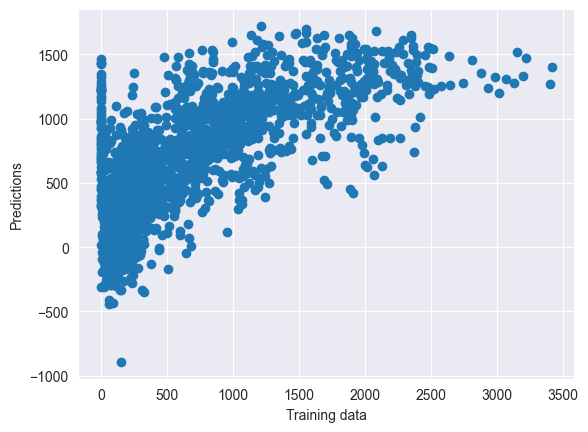

In [279]:
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Training data")
plt.ylabel("Predictions")
plt.show()

Mean Square Error library

In [280]:
from sklearn.metrics import mean_squared_error

In [281]:
mean_squared_error(Y_train, y_pred_train)

216033.4309167828

In [282]:
y_pred_test = model.predict(X_test)

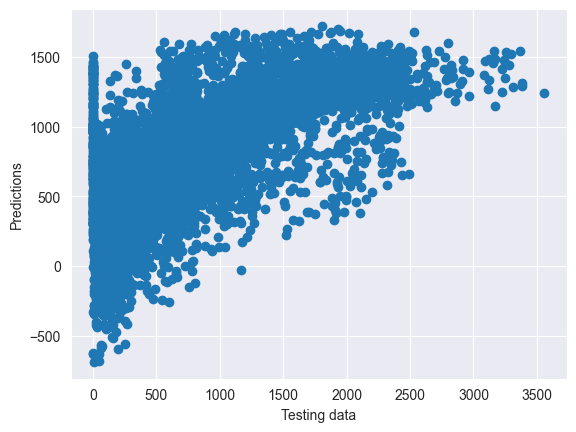

In [283]:
plt.scatter(Y_test, y_pred_test)
plt.xlabel("Testing data")
plt.ylabel("Predictions")
plt.show()

In [284]:
mean_squared_error(Y_test, y_pred_test)

216384.26594373508

In [285]:
from sklearn.metrics import r2_score

In [286]:
r2_score(Y_train, y_pred_train)

0.487510262856776

In [287]:
r2_score(Y_test, y_pred_test)

0.47804938570140243